In [5]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 
from urllib import request
import csv
from sklearn import decomposition
from sklearn import datasets

In [3]:
#importo datos
data_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_data.csv" 
fdata = request.urlopen(data_url)
labels_url = "https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_label.csv"
labelsdata = request.urlopen(labels_url)


In [4]:
def coeficientes_filtro(mascara):
  largo = np.size(mascara)
  coeficientes = []
  for i in np.arange(largo):
    if(mascara[i] == True):
      continue
    coeficientes.append(i)
  return coeficientes

dataset_data = np.genfromtxt(data_url, dtype= float, delimiter=',', skip_header = 1)
dataset_labels = np.genfromtxt(labels_url, dtype = str,delimiter=',', skip_header = 1)
parametros = dataset_data[:,1:]
labels = dataset_labels[:,1]
mask = np.where(labels != '', True, False)
filtros = coeficientes_filtro(mask)
parametros = np.delete(parametros, filtros, axis=0)
labels = np.delete(labels, filtros, axis = 0)
largo = np.size(labels)
labels[labels == 'healthy'] = 0
labels[labels == 'post-surgery'] = 1
labels[labels == 'benign'] = 2
labels[labels == 'cancer'] = 3
labels = labels.astype(np.int32)
mu = np.mean(parametros, axis=0)
sigma = np.std(parametros, axis=0)
parametros = (parametros - mu)/sigma

Text(0.5, 1.0, 'Dimension vs ECM')

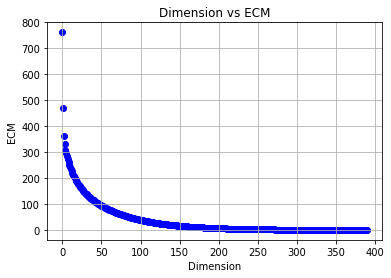

In [12]:
#busco la dimension que reduce el ecm!
for x in np.arange(np.shape(parametros)[0]):
  pca = decomposition.PCA(n_components=x)
  pca.fit(parametros)
  U = pca.transform(parametros)
  Xh = pca.inverse_transform(U)
  #print('ECM',np.sum((quimicos_norm-Xh)**2)/largo)
  plt.scatter(x, np.sum((parametros-Xh)**2)/largo, color ='blue')
plt.grid()
plt.xlabel('Dimension')
plt.ylabel('ECM')
plt.title('Dimension vs ECM')

Text(0.5, 1.0, 'Dimesion vs Energia')

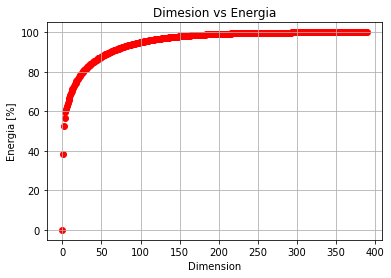

In [11]:
#porcentaje de energia en funcion de las dimensiones
for x in np.arange(np.shape(parametros)[0]):
  pca = decomposition.PCA(n_components=x)
  pca.fit(parametros)
  U = pca.transform(parametros)
  Xh = pca.inverse_transform(U)
  #print('ECM',np.sum((quimicos_norm-Xh)**2)/largo)
  plt.scatter(x,100*np.sum(pca.explained_variance_ratio_), color = 'red')
plt.grid()
plt.ylabel("Energia [%]")
plt.xlabel("Dimension")
plt.title("Dimesion vs Energia")

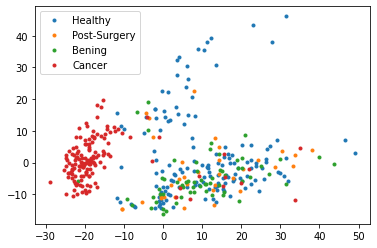

In [15]:
y = labels
pca = decomposition.PCA(n_components=2)
pca.fit(parametros)
U = pca.transform(parametros)
for name, label in [('Healthy', 0), ('Post-Surgery', 1), ('Bening', 2),('Cancer', 3)]:
  plt.plot(U[y==label,0],U[y==label,1],'.',label=name)
plt.legend()  
plt.show()